# import section

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier
from scipy.stats import uniform, randint

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import itertools

# 1.load data

create a dictionary to save all the results, keys are method, values are a list of results including recall, precision, f1 score, auc score

In [106]:
print(Counter(dfq.buggy))
print(Counter(dfo.buggy))

Counter({0: 21838, 1: 1983})
Counter({0: 10428, 1: 1613})


we have two datasets, qt and openstack, they have the same features

In [3]:
#files are located under the folder 'data'
dfOpS = pd.read_csv ('data/openstack.csv')
dfQT = pd.read_csv ('data/qt.csv')
print(dfQT.shape)
print(dfOpS.shape)

(25150, 37)
(12374, 37)


In [25]:
dfQT.columns

Index(['Unnamed: 0', 'commit_id', 'author_date', 'bugcount', 'fixcount', 'la',
       'ld', 'nf', 'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'hcmt', 'self',
       'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp', 'rrexp',
       'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr', 'churn',
       'buggy', 'fix', 'bugdens', 'strata'],
      dtype='object')

In [4]:
dfOpS.columns

Index(['Unnamed: 0', 'commit_id', 'author_date', 'bugcount', 'fixcount', 'la',
       'ld', 'nf', 'nd', 'ns', 'ent', 'revd', 'nrev', 'rtime', 'hcmt', 'self',
       'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp', 'rrexp',
       'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr', 'churn',
       'buggy', 'fix', 'bugdens', 'strata'],
      dtype='object')

In [5]:
dfQT.head(10)

,Unnamed: 0,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,...,rsexp,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata
0,1,000025ca1ecabe363934bdc8794b01ffb926af66,1351855558,0,0,2,0,1,1,1,...,82.0,130.0,0.013219,0.018286,0.028861,2,False,False,0.0,2
1,2,0001dcd3a2d67fe8832562746a293754a9a8d7a0,1339594674,0,0,53,42,8,4,1,...,NaN,NaN,0.000000,0.000000,0.000000,95,False,False,0.0,1
2,3,0003fa206c5abac81c85bcd662a9555e41c3bfbe,1373999392,0,0,28,4,2,1,1,...,NaN,NaN,0.000000,0.000000,0.000000,32,False,False,0.0,4
3,5,0006255d847ebff402dc771092c115ae714d8e10,1363894865,0,0,12,10,4,1,1,...,1496.0,1673.0,0.029888,0.114432,0.127962,22,False,False,0.0,3
4,6,0008428f9088d1d6623dec5706d49cbf65692e28,1320409350,0,0,53,39,6,4,2,...,246.0,265.0,0.011343,0.087558,0.094293,92,False,False,0.0,0
5,7,0008a6f4000674020db96ff4475094d049d094f6,1381763045,0,1,1,1,1,1,1,...,2007.0,2007.0,0.021312,0.117889,0.117889,2,False,True,0.0,4
6,8,000b6330d4ca7165ff241b21ee728ed28d82fba1,1374140454,0,0,4,0,2,1,1,...,983.0,1003.0,0.001396,0.065412,0.066742,4,False,False,0.0,4
7,11,0014ec0a65ec2ce6ef29938e552dae7aca90024d,1338165639,0,0,20,0,5,2,1,...,257.0,269.0,0.002595,0.033472,0.035029,20,False,False,0.0,1
8,13,001b80305addc5e47a1c80f6629a757178d95c81,1373528887,0,1,2,1,1,1,1,...,1620.0,1620.0,0.012613,0.108175,0.108175,3,False,True,0.0,4
9,14,001bd63e813cf19d1d6abbbfeb2599e6804807d5,1311258797,0,0,16,16,2,1,1,...,69.0,69.0,0.131183,0.150538,0.150538,32,False,False,0.0,0


# 2. data exploration and preprocessing

## 2.1 Exploration: check for correlation, missing values, irrelavent features, etc

we must do preprocessing separately because we want to normalize the data separately before combining them together, here I will first use qt to demonstratate the preprocessing steps

(1) first drop irrelavent features like commit_id, author date, bug count, fix count, lines of code, bug density, whether the bug is fixed

In [7]:
droppedColumns=['Unnamed: 0','commit_id','author_date','bugcount','fixcount','revd','churn','fix','bugdens','strata']
dfQT=dfQT.drop(columns=droppedColumns)
print('existing columns',dfQT.columns)
dfQT.head(5)

existing columns Index(['la', 'ld', 'nf', 'nd', 'ns', 'ent', 'nrev', 'rtime', 'hcmt', 'self',
       'ndev', 'age', 'nuc', 'app', 'aexp', 'rexp', 'oexp', 'arexp', 'rrexp',
       'orexp', 'asexp', 'rsexp', 'osexp', 'asawr', 'rsawr', 'osawr', 'buggy'],
      dtype='object')


,la,ld,nf,nd,ns,ent,nrev,rtime,hcmt,self,...,arexp,rrexp,orexp,asexp,rsexp,osexp,asawr,rsawr,osawr,buggy
0,2,0,1,1,1,0.000000,3.0,18903.0,2.0,False,...,423,817.0,968.0,59,82.0,130.0,0.013219,0.018286,0.028861,False
1,53,42,8,4,1,0.846452,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0.000000,0.000000,0.000000,False
2,28,4,2,1,1,0.974489,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0.000000,0.000000,0.000000,False
3,12,10,4,1,1,0.665790,1.0,6852.0,2.0,False,...,895,1912.0,2174.0,390,1496.0,1673.0,0.029888,0.114432,0.127962,False
4,53,39,6,4,2,0.731369,2.0,31671.0,7.0,False,...,31,250.0,269.0,31,246.0,265.0,0.011343,0.087558,0.094293,False


(2) change 'self' column to 'selfC', since self is a preoccupied word in python

In [8]:
dfQT.rename(columns={'self' : 'selfC'},inplace=True)

(3) convert the target feature 'buggy' from value of 'True' 'False' to 0,1

In [9]:
dfQT.buggy.replace({True: 1, False: 0},inplace=True) 

(4) drop empty value

In [14]:
#first check columns with empty values and the number of rows with missing values
print((dfQT.isna().sum()))

la          0
ld          0
nf          0
nd          0
ns          0
ent         0
nrev     1329
rtime    1329
hcmt     1329
selfC    1329
ndev        0
age         0
nuc         0
app      1329
aexp        0
rexp     1329
oexp     1329
arexp       0
rrexp    1329
orexp    1329
asexp       0
rsexp    1329
osexp    1329
asawr       0
rsawr       0
osawr       0
buggy       0
dtype: int64


In [15]:
print('number of rows with missing values',sum(dfQT.isnull().sum(axis = 1)>0))

number of rows with missing values 1329


since we have 25150 rows, we can simply drop these 1329 rows

In [16]:
nanIndex=(dfQT.loc[pd.isnull(dfQT).any(1)]).index
dfQT.drop(nanIndex,inplace=True)
print(dfQT.shape)

(23821, 27)


(5) check correlation, and drop features that have correlation with each other

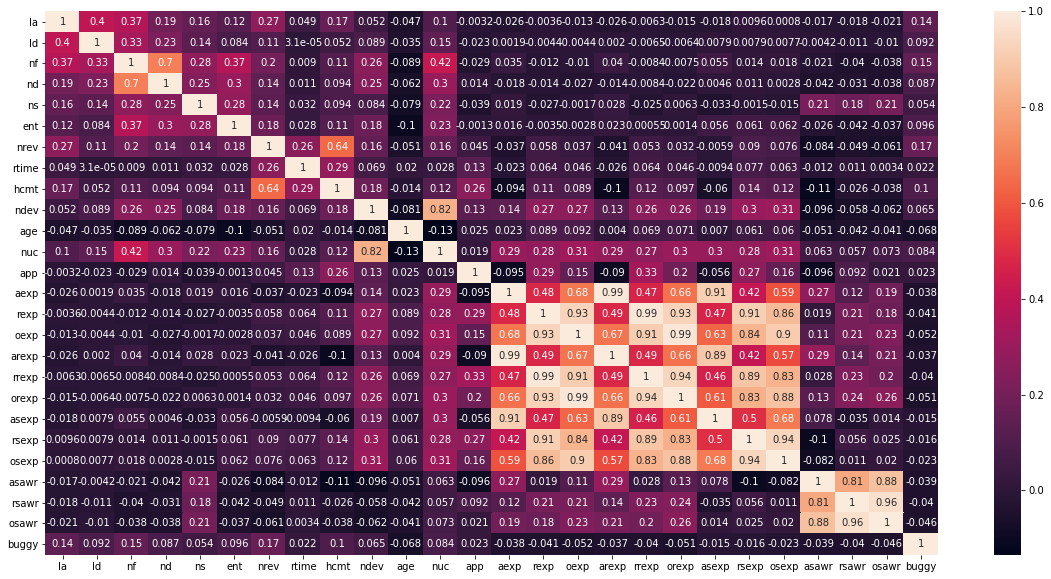

In [17]:
plt.figure(figsize=(20,10)) 
corrMatrix = dfQT.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

these is clearly some values that are strong correlated, we will drop features that have correlation above 0.8

In [96]:
dfQT.corr()['buggy'].sort_values(ascending=False)

buggy    1.000000
nrev     0.167718
nf       0.153416
la       0.142552
hcmt     0.099931
ent      0.095778
ld       0.091509
nd       0.087056
nuc      0.083797
ndev     0.065015
ns       0.054435
selfC    0.043266
app      0.023379
rtime    0.022183
asexp   -0.014509
rsexp   -0.015608
osexp   -0.023407
arexp   -0.037126
aexp    -0.037908
asawr   -0.038980
rrexp   -0.039889
rsawr   -0.040130
rexp    -0.041225
osawr   -0.045543
orexp   -0.051486
oexp    -0.052349
age     -0.067696
Name: buggy, dtype: float64

we can see no feature is highly correlated withou our target value 'buggy'

In [18]:
correlated_features = set()       
correlation_matrix = dfQT.corr()  
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8: #abs value!
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
                
dfQT.drop(correlated_features,axis=1,inplace=True)
print('shape after dropping correlated features',dfQT.shape)

shape after dropping correlated features (23821, 17)


In [20]:
print('higly correlated features are')
print(correlated_features)

higly correlated features are
{'osexp', 'nuc', 'orexp', 'rsexp', 'oexp', 'arexp', 'asexp', 'rrexp', 'rsawr', 'osawr'}


(6) column 'selfC' is of True False value, we will use one hot vector to expand it to 2 columns

In [21]:
tempDummy = pd.get_dummies(dfQT.selfC, prefix='selfC')
dfQT=pd.concat([dfQT, tempDummy], axis=1)
dfQT=dfQT.drop(columns=['selfC'])

In [23]:
dfQT.head(2) #we can see the last two columns are one hot vector for selfC

,la,ld,nf,nd,ns,ent,nrev,rtime,hcmt,ndev,age,app,aexp,rexp,asawr,buggy,selfC_False,selfC_True
0,2,0,1,1,1,0.00000,3.0,18903.0,2.0,12,1479074.0,1.0,431,883.0,0.013219,0,1,0
3,12,10,4,1,1,0.66579,1.0,6852.0,2.0,4,15242.5,1.0,946,2219.0,0.029888,0,1,0


as we can see, the dataset is highly imbalanced

In [57]:
Counter(dfQT.buggy)

Counter({False: 23148, True: 2002})

(7) to apply the same process to Openstack

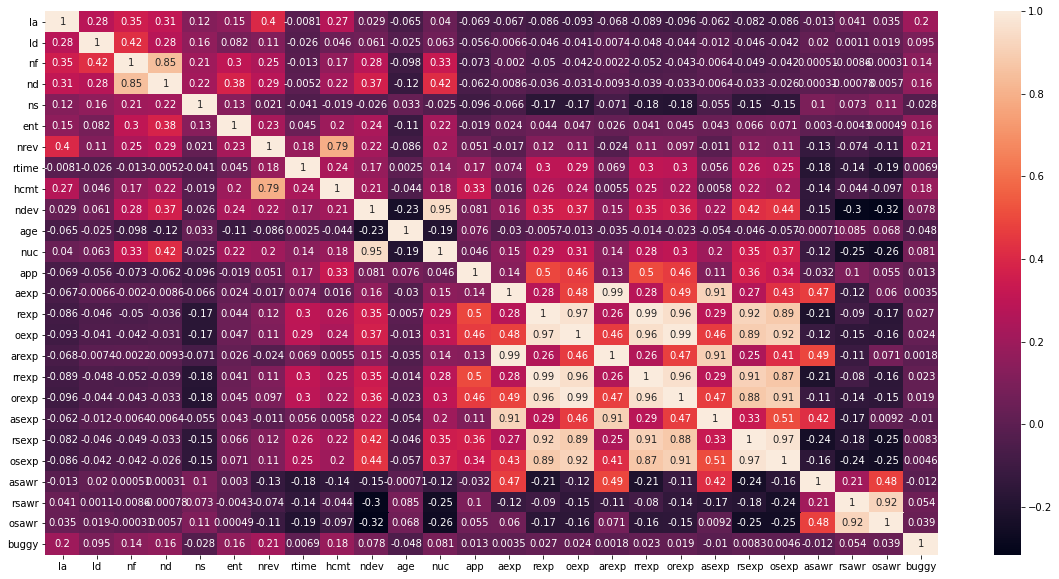

In [108]:
#apply the same method to Openstack
droppedColumns=['Unnamed: 0','commit_id','author_date','bugcount','fixcount','revd','churn','fix','bugdens','strata']
dfOpS=dfOpS.drop(columns=droppedColumns)

dfOpS.rename(columns={'self' : 'selfC'},inplace=True)
dfOpS.buggy.replace({True: 1, False: 0},inplace=True) 

nanIndex=(dfOpS.loc[pd.isnull(dfOpS).any(1)]).index
dfOpS.drop(nanIndex,inplace=True)

plt.figure(figsize=(20,10)) 
corrMatrix = dfOpS.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [109]:
correlated_features = set()       
correlation_matrix = dfOpS.corr()  
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8: #abs value!
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
                
dfOpS.drop(correlated_features,axis=1,inplace=True)
print('shape after dropping correlated features',dfOpS.shape)

print('higly correlated features are')
print(correlated_features)

shape after dropping correlated features (12041, 17)
higly correlated features are
{'osexp', 'nuc', 'orexp', 'rsexp', 'oexp', 'arexp', 'asexp', 'rrexp', 'nd', 'osawr'}


Now we define the complete preProcessing function

In [24]:
def preProcessing(dfOriginal):
    
    df=dfOriginal.copy()
    
    
    #drop columns, 'revd' is all True
    droppedColumns=['Unnamed: 0','commit_id','author_date','bugcount','fixcount','revd','churn','fix','bugdens','strata']
    df=df.drop(columns=droppedColumns)
    
    #rename 'self' column
    df.rename(columns={'self' : 'selfC'},inplace=True)
        
    #convert target value to 0,1
    df.buggy.replace({True: 1, False: 0},inplace=True)    
    
    #drop empty value
    nanIndex=(df.loc[pd.isnull(df).any(1)]).index
    df.drop(nanIndex,inplace=True)
    
    #change datatype of selfC to bol
    df=df.astype({'selfC': 'bool'})
    
    #drop highly correlated features
    correlated_features = set()       
    correlation_matrix = df.corr()  
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8: #abs value!
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
                
    df.drop(correlated_features,axis=1,inplace=True)

    #convert true/false to one hot
    tempDummy = pd.get_dummies(df.selfC, prefix='selfC')
    df=pd.concat([df, tempDummy], axis=1)
    df=df.drop(columns=['selfC'])
    
    #switch buggy column to the back for easy train test split
    tempbuggy=df['buggy']
    df['buggyTarget']=tempbuggy
    df=df.drop(columns=['buggy'])
    df.rename(columns={'buggyTarget' : 'buggy'},inplace=True)
    
    return df

load two datasets again, and run it over

In [27]:
dfOpS = pd.read_csv ('data/openstack.csv')
dfQT = pd.read_csv ('data/qt.csv')

## 2.2 preprocessing for qt

In [28]:
dfq=preProcessing(dfQT)
dfq.head(3)

,la,ld,nf,nd,ns,ent,nrev,rtime,hcmt,ndev,age,app,aexp,rexp,asawr,selfC_False,selfC_True,buggy
0,2,0,1,1,1,0.000000,3.0,18903.0,2.0,12,1.479074e+06,1.0,431,883.0,0.013219,1,0,0
3,12,10,4,1,1,0.665790,1.0,6852.0,2.0,4,1.524250e+04,1.0,946,2219.0,0.029888,1,0,0
4,53,39,6,4,2,0.731369,2.0,31671.0,7.0,19,4.665812e+05,1.0,31,250.0,0.011343,1,0,0


In [29]:
#train test split
Xq_train, Xq_test, yq_train, yq_test = train_test_split(
dfq.iloc[:,:-1], dfq['buggy'], test_size=0.2, random_state=42)

print('Xq_train',Xq_train.shape)
print('yq_train',yq_train.shape)
print('Xq_test',Xq_test.shape)
print('yq_test',yq_test.shape)

Xq_train (19056, 17)
yq_train (19056,)
Xq_test (4765, 17)
yq_test (4765,)


normalize the data using StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(Xq_train)
Xq_train_scaled = scaler.transform(Xq_train)  
Xq_test_scaled = scaler.transform(Xq_test)
print(Xq_train_scaled[0])

[-0.1979148  -0.18028191  0.06977042  0.07992677 -0.34677548  1.40207312
 -0.51712283 -0.27559102 -0.41105301  0.00558086 -0.00401798 -1.04137536
  1.86412265  0.82920223  0.34005814  0.23309266 -0.23309266]


## 2.3 preprocessing for openstack

In [31]:
dfo=preProcessing(dfOpS)
dfo.head(3)

,la,ld,nf,ns,ent,nrev,rtime,hcmt,ndev,age,app,aexp,rexp,asawr,rsawr,selfC_False,selfC_True,buggy
0,2,2,2,1,1.000000,1.0,6495227.0,4.0,6,170682.0,2.0,12,354.0,0.003472,0.902778,1,0,0
1,9,6,1,1,0.000000,1.0,1616714.0,10.0,4,7448.0,6.0,310,1343.0,0.024735,0.978799,1,0,0
2,7,8,2,1,0.996792,1.0,175209.0,3.0,17,277757.0,3.0,122,425.0,0.200000,0.573333,1,0,0


In [101]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(
dfo.iloc[:,:-1], dfo['buggy'], test_size=0.2, random_state=42)

print('Xo_train',Xo_train.shape)
print('yo_train',yo_train.shape)
print('Xo_test',Xo_test.shape)
print('yo_test',yo_test.shape)


Xo_train (9632, 17)
yo_train (9632,)
Xo_test (2409, 17)
yo_test (2409,)


In [34]:
#normalize
scaler = StandardScaler()
scaler.fit(Xo_train)
Xo_train_scaled = scaler.transform(Xo_train)  
Xo_test_scaled = scaler.transform(Xo_test)
print(Xo_train_scaled[0])

[-0.32882879 -0.21798493 -0.47041237 -0.2527428  -1.31077331 -0.45207935
  0.04154494  0.00862447 -0.79075206  0.51522362 -0.09476685  0.03820792
 -0.76878528 -0.43909901  1.93628557  0.09209119 -0.09209119]


# 3 connect opentack and qt together

In [36]:
X_train_scaled=np.concatenate((Xq_train_scaled, Xo_train_scaled), axis=0)
y_train=np.concatenate((yq_train, yo_train), axis=0)
X_test_scaled=np.concatenate((Xq_test_scaled, Xo_test_scaled), axis=0)
y_test=np.concatenate((yq_test, yo_test), axis=0)


print('X_train_scaled',X_train_scaled.shape)
print('y_train',y_train.shape)
print('X_test_scaled',X_test_scaled.shape)
print('y_test',y_test.shape)


X_train_scaled (28688, 17)
y_train (28688,)
X_test_scaled (7174, 17)
y_test (7174,)


shuffle the training data

In [38]:
X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=0)

# 4 try baseline model without sampling first

## 4.1 Logistic Regression

In [280]:
clf = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5108986782637671
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6395
           1       0.39      0.03      0.05       779

    accuracy                           0.89      7174
   macro avg       0.64      0.51      0.50      7174
weighted avg       0.84      0.89      0.84      7174



## 4.2 Gaussian Naive Bayes

In [282]:
clf = GaussianNB().fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5553659841359534
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6395
           1       0.23      0.18      0.21       779

    accuracy                           0.85      7174
   macro avg       0.57      0.56      0.56      7174
weighted avg       0.83      0.85      0.84      7174



## 4.3 Stochastic Gradient Descent

In [284]:
clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5032419623402028
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6395
           1       0.30      0.01      0.02       779

    accuracy                           0.89      7174
   macro avg       0.60      0.50      0.48      7174
weighted avg       0.83      0.89      0.84      7174



## 4.4 KNN

In [287]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5450092889884085
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6395
           1       0.32      0.12      0.18       779

    accuracy                           0.88      7174
   macro avg       0.61      0.55      0.55      7174
weighted avg       0.84      0.88      0.85      7174



## 4.5 Decision Tree

In [300]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5493856019174159
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6395
           1       0.19      0.20      0.20       779

    accuracy                           0.82      7174
   macro avg       0.55      0.55      0.55      7174
weighted avg       0.83      0.82      0.82      7174



## 4.6 Random Forest

In [291]:
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5195718132647357
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6395
           1       0.49      0.04      0.08       779

    accuracy                           0.89      7174
   macro avg       0.69      0.52      0.51      7174
weighted avg       0.85      0.89      0.85      7174



## 4.7 SVC

In [294]:
clf = SVC().fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
print('auc is', metrics.auc(fpr, tpr))
print(classification_report(y_test, y_pred))

auc is 0.5013000569082271
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6395
           1       0.27      0.00      0.01       779

    accuracy                           0.89      7174
   macro avg       0.58      0.50      0.47      7174
weighted avg       0.82      0.89      0.84      7174



as we can see, without sampling, all the basic models yield auc score that are just about 0.5, which are very bad

# 5 Six Oversampling Method

## 5.1 Radom Over Sampling 

In [314]:
#Random Over Sampler:
sm = RandomOverSampler(random_state=42)
X_train_scaled_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)
print(X_train_scaled_sampled.shape)
print(y_train_sampled.shape)

(51742, 17)
(51742,)


In [317]:
clf = LogisticRegression().fit(X_train_scaled_sampled, y_train_sampled)
y_pred=clf.predict(X_test_scaled)
print('recall',round(recall_score(y_test, y_pred, pos_label=1),3))
print('precision',round(precision_score(y_test, y_pred, pos_label=1),3))
print('f1',round(f1_score(y_test, y_pred, pos_label=1),3))
print('auc',round(roc_auc_score(y_test, y_pred),3))


recall 0.555
precision 0.202
f1 0.296
auc 0.644


create a list of model to test the perfromence separately

In [318]:
clfSVC = SVC()
clfRF = RandomForestClassifier()
clfDT = DecisionTreeClassifier()
clfKNN = KNeighborsClassifier(n_neighbors=3)
clfSGD = SGDClassifier(max_iter=1000, tol=1e-3)
clfGNB = GaussianNB()
clfLR = LogisticRegression()
model_list=[clfSVC,clfRF,clfDT,clfKNN,clfSGD,clfGNB,clfLR]


fit the data in each model and save the result

In [323]:
recall_list=[]
precision_list=[]
f1_list=[]
auc_list=[]
modelName_list=['SVC','Random Forest','Decision Tree','KNN','SGD','Gaussia NB','Logistic Re']

for m in model_list:
    m.fit(X_train_scaled_sampled, y_train_sampled)
    y_pred=m.predict(X_test_scaled)
    recall_list.append(round(recall_score(y_test, y_pred, pos_label=1),3))
    precision_list.append(round(precision_score(y_test, y_pred, pos_label=1),3))
    f1_list.append(round(f1_score(y_test, y_pred, pos_label=1),3))
    auc_list.append(round(roc_auc_score(y_test, y_pred),3))



In [332]:
dfResRandom=pd.DataFrame(data=[modelName_list,recall_list,precision_list,f1_list,auc_list],index=['model','recall','precision','f1','auc']).T
dfResRandom=dfResRandom.set_index('model').sort_values(by=['auc'],ascending=False)
dfResRandom

,recall,precision,f1,auc
model,,,,
SVC,0.565,0.228,0.325,0.666
Logistic Re,0.555,0.202,0.296,0.644
SGD,0.403,0.247,0.306,0.627
KNN,0.357,0.221,0.273,0.602
Gaussia NB,0.277,0.225,0.248,0.58
Decision Tree,0.208,0.221,0.214,0.559
Random Forest,0.096,0.377,0.153,0.538


## 5.2 SMOTE

In [335]:
#smote
sm = SMOTE(random_state=42)
X_train_scaled_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)

clfSVC = SVC()
clfRF = RandomForestClassifier()
clfDT = DecisionTreeClassifier()
clfKNN = KNeighborsClassifier(n_neighbors=3)
clfSGD = SGDClassifier(max_iter=1000, tol=1e-3)
clfGNB = GaussianNB()
clfLR = LogisticRegression()

model_list=[clfSVC,clfRF,clfDT,clfKNN,clfSGD,clfGNB,clfLR]
recall_list=[]
precision_list=[]
f1_list=[]
auc_list=[]

for m in model_list:
    m.fit(X_train_scaled_sampled, y_train_sampled)
    y_pred=m.predict(X_test_scaled)
    recall_list.append(round(recall_score(y_test, y_pred, pos_label=1),3))
    precision_list.append(round(precision_score(y_test, y_pred, pos_label=1),3))
    f1_list.append(round(f1_score(y_test, y_pred, pos_label=1),3))
    auc_list.append(round(roc_auc_score(y_test, y_pred),3))

dfResSMOTE=pd.DataFrame(data=[modelName_list,recall_list,precision_list,f1_list,auc_list],index=['model','recall','precision','f1','auc']).T
dfResSMOTE=dfResSMOTE.set_index('model').sort_values(by=['auc'],ascending=False)
dfResSMOTE

,recall,precision,f1,auc
model,,,,
SVC,0.567,0.218,0.315,0.66
Logistic Re,0.574,0.194,0.29,0.642
SGD,0.639,0.168,0.266,0.627
KNN,0.471,0.207,0.288,0.626
Random Forest,0.261,0.369,0.305,0.603
Gaussia NB,0.32,0.227,0.266,0.594
Decision Tree,0.27,0.191,0.224,0.565


## 5.3 BorderLine Smote, KMeans Smote, SVM Smote, ADASYN

In [339]:
BLSmote=BorderlineSMOTE(random_state=42,n_jobs=-1)
KMSmote=KMeansSMOTE(random_state=42,n_jobs=-1,cluster_balance_threshold=0.1)
SVMSmote=SVMSMOTE(random_state=42,n_jobs=-1)
adaSYN=ADASYN(random_state=42,n_jobs=-1)


def getResTabel(sm):
    X_train_scaled_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)
    
    clfSVC = SVC()
    clfRF = RandomForestClassifier()
    clfDT = DecisionTreeClassifier()
    clfKNN = KNeighborsClassifier(n_neighbors=3)
    clfSGD = SGDClassifier(max_iter=1000, tol=1e-3)
    clfGNB = GaussianNB()
    clfLR = LogisticRegression()

    model_list=[clfSVC,clfRF,clfDT,clfKNN,clfSGD,clfGNB,clfLR]
    recall_list=[]
    precision_list=[]
    f1_list=[]
    auc_list=[]

    for m in model_list:
        m.fit(X_train_scaled_sampled, y_train_sampled)
        y_pred=m.predict(X_test_scaled)
        recall_list.append(round(recall_score(y_test, y_pred, pos_label=1),3))
        precision_list.append(round(precision_score(y_test, y_pred, pos_label=1),3))
        f1_list.append(round(f1_score(y_test, y_pred, pos_label=1),3))
        auc_list.append(round(roc_auc_score(y_test, y_pred),3))

    dfSMRes=pd.DataFrame(data=[modelName_list,recall_list,precision_list,f1_list,auc_list],index=['model','recall','precision','f1','auc']).T
    dfSMRes=dfSMRes.set_index('model').sort_values(by=['auc'],ascending=False)
    return dfSMRes

dfBLSmote=getResTabel(BLSmote)
dfKMSmote=getResTabel(KMSmote)       
dfSVMSmote=getResTabel(SVMSmote)
dfADA=getResTabel(adaSYN)

In [338]:
dfBLSmote

,recall,precision,f1,auc
model,,,,
SVC,0.544,0.228,0.321,0.66
Logistic Re,0.549,0.199,0.292,0.64
SGD,0.54,0.187,0.278,0.627
KNN,0.438,0.222,0.295,0.625
Random Forest,0.246,0.352,0.29,0.596
Gaussia NB,0.297,0.221,0.253,0.585
Decision Tree,0.298,0.211,0.247,0.581


In [340]:
dfKMSmote

,recall,precision,f1,auc
model,,,,
SVC,0.371,0.238,0.29,0.613
SGD,0.427,0.183,0.256,0.598
Logistic Re,0.379,0.196,0.258,0.595
KNN,0.28,0.264,0.272,0.592
Gaussia NB,0.307,0.203,0.245,0.58
Random Forest,0.193,0.366,0.252,0.576
Decision Tree,0.253,0.207,0.228,0.567


In [341]:
dfSVMSmote

,recall,precision,f1,auc
model,,,,
SVC,0.445,0.286,0.348,0.655
Logistic Re,0.394,0.259,0.313,0.628
KNN,0.403,0.237,0.299,0.623
Random Forest,0.241,0.373,0.293,0.596
SGD,0.307,0.24,0.269,0.594
Decision Tree,0.321,0.221,0.262,0.592
Gaussia NB,0.205,0.219,0.212,0.558


In [342]:
dfADA

,recall,precision,f1,auc
model,,,,
SVC,0.589,0.209,0.309,0.659
Logistic Re,0.594,0.184,0.281,0.637
SGD,0.594,0.175,0.27,0.626
KNN,0.472,0.201,0.282,0.622
Gaussia NB,0.347,0.228,0.275,0.602
Random Forest,0.236,0.354,0.283,0.592
Decision Tree,0.244,0.187,0.212,0.557


as we can see, SVC performs the best across each oversampling methods

In [369]:
t1=dfResRandom.iloc[0]
dfBest=t1.to_frame().T
dfBest=dfBest.append(dfResSMOTE.iloc[0].T)
dfBest=dfBest.append(dfBLSmote.iloc[0].T)
dfBest=dfBest.append(dfKMSmote.iloc[0].T)
dfBest=dfBest.append(dfSVMSmote.iloc[0].T)
dfBest=dfBest.append(dfADA.iloc[0].T)

indexBest=['Random','Smote','BLSmote','KMSmote','SVMSmote','adaSYN']
dfBest.index=indexBest
dfBest=dfBest.sort_values(by=['auc'],ascending=False)
dfBest


,recall,precision,f1,auc
Random,0.565,0.228,0.325,0.666
Smote,0.567,0.218,0.315,0.66
BLSmote,0.544,0.228,0.321,0.66
adaSYN,0.589,0.209,0.309,0.659
SVMSmote,0.445,0.286,0.348,0.655
KMSmote,0.371,0.238,0.29,0.613


as we can see, for using SVC model, Random order oversampling, Smote, Borderline Smote and Adaptive Synthetic Sampling basically performs similary in auc score

# 6 Hyperparamter tuning with cross-validation on SVC with SMOTE

In [370]:
sm = SMOTE(random_state=42)
X_train_scaled_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)

In [389]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


grid = GridSearchCV(SVC(), tuned_parameters, n_jobs=5, verbose = 3,scoring='roc_auc')
    

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print(grid.best_estimator_)

print("----")


y_pred=grid.predict(X_test_scaled)

print('recall',round(recall_score(y_test, y_pred, pos_label=1),3))
print('precision',round(precision_score(y_test, y_pred, pos_label=1),3))
print('f1',round(f1_score(y_test, y_pred, pos_label=1),3))
print('auc',round(roc_auc_score(y_test, y_pred),3))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)
----
recall 0.591
precision 0.223
f1 0.324
auc 0.67


the auc result has only been raised by 0.01

to test the model on qt and openstack separately

In [391]:
print('qt')
y_pred=grid.predict(Xq_test_scaled)
print('recall',   round(recall_score(   yq_test, y_pred, pos_label=1),3))
print('precision',round(precision_score(yq_test, y_pred, pos_label=1),3))
print('f1',       round(f1_score(       yq_test, y_pred, pos_label=1),3))
print('auc',      round(roc_auc_score(  yq_test, y_pred),3))

print('------------------------')
print('openstack')
y_pred=grid.predict(Xo_test_scaled)
print('recall',   round(recall_score(   yo_test, y_pred, pos_label=1),3))
print('precision',round(precision_score(yo_test, y_pred, pos_label=1),3))
print('f1',       round(f1_score(       yo_test, y_pred, pos_label=1),3))
print('auc',      round(roc_auc_score(  yo_test, y_pred),3))

qt
recall 0.454
precision 0.194
f1 0.272
auc 0.637
------------------------
openstack
recall 0.747
precision 0.249
f1 0.374
auc 0.674


# 7 Hyperparamter tuning with cross-validation on Logistic Regression with SMOTE

In [33]:
sm = SMOTE(random_state=42)
X_train_scaled_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)

define a result printing method

In [40]:
def printRes(name,ytest,ypred):
    print(name)
    print('recall',   round(recall_score(   ytest, ypred, pos_label=1),3))
    print('precision',round(precision_score(ytest, ypred, pos_label=1),3))
    print('f1',       round(f1_score(       ytest, ypred, pos_label=1),3))
    print('auc',      round(roc_auc_score(  ytest, ypred),3))
    print()

In [405]:

tuned_parameters = [{"C":np.logspace(-3,3,7), "penalty":["l2"]}]


grid = GridSearchCV(LogisticRegression(), tuned_parameters, n_jobs=5, verbose = 3,scoring='roc_auc',error_score='raise')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print(grid.best_estimator_)
print()

y_pred=grid.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=grid.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=grid.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)



Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'C': 1000.0, 'penalty': 'l2'}
LogisticRegression(C=1000.0)

all
recall 0.58
precision 0.196
f1 0.292
auc 0.645

qt
recall 0.579
precision 0.156
f1 0.246
auc 0.64

openstack
recall 0.581
precision 0.274
f1 0.373
auc 0.654



In [409]:
lr=LogisticRegression(C= 1000, penalty= 'l2',)
lr.fit(X_train_scaled_sampled, y_train_sampled)

y_pred=lr.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=lr.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=lr.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)


all
recall 0.58
precision 0.196
f1 0.292
auc 0.645

qt
recall 0.579
precision 0.156
f1 0.246
auc 0.64

openstack
recall 0.581
precision 0.274
f1 0.373
auc 0.654



we see the reuslt is not better than SVM

# 8. Probability tuning algorithm

In [39]:
print(X_train_scaled.shape) 
print(y_train.shape)

(28688, 17)
(28688,)


In [41]:
sm = SMOTE(random_state=42)
X_train_scaled_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)
print(X_train_scaled_sampled.shape)
print(y_train_sampled.shape)

(51742, 17)
(51742,)


## 8.1 Platt Scaling on data not sampled using SVC

In [44]:
model = SVC(C= 100, gamma= 0.001, kernel= 'rbf')
calibrated_clf = CalibratedClassifierCV(base_estimator=model, cv=3,method='sigmoid',n_jobs=-1)
calibrated_clf.fit(X_train_scaled, y_train)

curModel=calibrated_clf

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

all
recall 0.01
precision 0.8
f1 0.02
auc 0.505

qt
recall 0.019
precision 0.889
f1 0.038
auc 0.51

openstack
recall 0.0
precision 0.0
f1 0.0
auc 0.5



## 8.2 Platt Scaling on oversampled data using SVC

In [46]:
model = SVC(C= 100, gamma= 0.001, kernel= 'rbf')
calibrated_clf = CalibratedClassifierCV(base_estimator=model, cv=3,method='sigmoid',n_jobs=-1)
calibrated_clf.fit(X_train_scaled_sampled, y_train_sampled)

curModel=calibrated_clf

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

all
recall 0.608
precision 0.208
f1 0.31
auc 0.663

qt
recall 0.486
precision 0.168
f1 0.25
auc 0.628

openstack
recall 0.749
precision 0.253
f1 0.378
auc 0.678



## 8.3 Isotonic Regression on data not sampled using SVC

In [417]:
model = SVC(C= 100, gamma= 0.001, kernel= 'rbf')
calibrated_clf = CalibratedClassifierCV(base_estimator=model, cv=3,method='isotonic',n_jobs=-1)
calibrated_clf.fit(X_train_scaled, y_train)

curModel=calibrated_clf

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

all
recall 0.006
precision 0.714
f1 0.013
auc 0.503

qt
recall 0.012
precision 0.833
f1 0.024
auc 0.506

openstack
recall 0.0
precision 0.0
f1 0.0
auc 0.5



## 8.4 Isotonic Regression on oversampled data using SVC

In [43]:
model = SVC(C= 100, gamma= 0.001, kernel= 'rbf')
calibrated_clf = CalibratedClassifierCV(base_estimator=model, cv=3,method='isotonic',n_jobs=-1)
calibrated_clf.fit(X_train_scaled_sampled, y_train_sampled)

curModel=calibrated_clf

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

all
recall 0.606
precision 0.215
f1 0.318
auc 0.668

qt
recall 0.488
precision 0.175
f1 0.258
auc 0.634

openstack
recall 0.741
precision 0.26
f1 0.385
auc 0.683



# 9 Seven Undersampling Method

we will use (1) Near Miss Undersampling with three version (2) Tomek Links for Undersampling (3) Edited Nearest Neighbors Rule for Undersampling (4) One-Sided Selection for Undersampling (5) Neighborhood Cleaning Rule for Undersampling

and we still evalute each method on 7 classificaiton models: SVC, Random Forest, Decsion Tree, KNN, stochastic graident descent, Gaussian Naive Bayes, and Logistic Regression


In [436]:
NM1 = NearMiss(version=1, n_neighbors=5)
NM2 = NearMiss(version=2, n_neighbors=5)
NM3 = NearMiss(version=3, n_neighbors=5)
TL = TomekLinks()
ENN=EditedNearestNeighbours(n_neighbors=3)
OSS = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
NCR = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)


def getResTabel(sm,name):
    
    X_train_scaled_under, y_train_under = sm.fit_resample(X_train_scaled,y_train)

    print('over')
    clfSVC = SVC()
    clfRF = RandomForestClassifier()
    clfDT = DecisionTreeClassifier()
    clfKNN = KNeighborsClassifier(n_neighbors=3)
    clfSGD = SGDClassifier(max_iter=1000, tol=1e-3)
    clfGNB = GaussianNB()
    clfLR = LogisticRegression()

    model_list=[clfSVC,clfRF,clfDT,clfKNN,clfSGD,clfGNB,clfLR]
    recall_list=[]
    precision_list=[]
    f1_list=[]
    auc_list=[]

    index=0
    for m in model_list:
        m.fit(X_train_scaled_under, y_train_under)
        y_pred=m.predict(X_test_scaled)
        recall_list.append(   round(recall_score(   y_test, y_pred, pos_label=1),3))
        precision_list.append(round(precision_score(y_test, y_pred, pos_label=1),3))
        f1_list.append(       round(f1_score(       y_test, y_pred, pos_label=1),3))
        auc_list.append(      round(roc_auc_score(  y_test, y_pred),3))
        print(name,index,'finished')
        index+=1

    dfSMRes=pd.DataFrame(data=[modelName_list,recall_list,precision_list,f1_list,auc_list],index=['model','recall','precision','f1','auc']).T
    dfSMRes=dfSMRes.set_index('model').sort_values(by=['auc'],ascending=False)
    
    
    return dfSMRes


dfNM1=getResTabel(NM1,'NM1')
dfNM2=getResTabel(NM2,'NM2')
dfNM3=getResTabel(NM3,'NM3')
dfTL=getResTabel(TL,'TL')
dfENN=getResTabel(ENN,'ENN')
dfOSS=getResTabel(OSS,'OSS')
dfNCR=getResTabel(NCR,'NCR')

over
TL 0 finished
TL 1 finished
TL 2 finished
TL 3 finished
TL 4 finished
TL 5 finished
TL 6 finished
over
ENN 0 finished
ENN 1 finished
ENN 2 finished
ENN 3 finished
ENN 4 finished
ENN 5 finished
ENN 6 finished
over
OSS 0 finished
OSS 1 finished
OSS 2 finished
OSS 3 finished
OSS 4 finished
OSS 5 finished
OSS 6 finished
over
NCR 0 finished
NCR 1 finished
NCR 2 finished
NCR 3 finished
NCR 4 finished
NCR 5 finished
NCR 6 finished


## 9.1 NearMiss-1: 
Majority class examples with minimum average distance to three closest minority class examples

In [429]:
dfNM1

,recall,precision,f1,auc
model,,,,
KNN,0.883,0.123,0.216,0.559
Logistic Re,0.849,0.123,0.215,0.556
SGD,0.846,0.122,0.214,0.553
SVC,0.878,0.121,0.213,0.55
Gaussia NB,0.869,0.121,0.212,0.55
Random Forest,0.917,0.119,0.21,0.543
Decision Tree,0.899,0.118,0.209,0.541


## 9.2 NearMiss-2: 
Majority class examples with minimum average distance to three furthest minority class examples.

In [430]:
dfNM2

,recall,precision,f1,auc
model,,,,
Gaussia NB,0.291,0.112,0.162,0.506
SGD,0.784,0.097,0.173,0.449
Logistic Re,0.747,0.095,0.169,0.44
KNN,0.728,0.094,0.167,0.437
Random Forest,0.718,0.092,0.164,0.429
Decision Tree,0.712,0.091,0.161,0.423
SVC,0.687,0.09,0.158,0.418


## 9.3 NearMiss-3: 
Majority class examples with minimum distance to each minority class example.

In [431]:
dfNM3

,recall,precision,f1,auc
model,,,,
Random Forest,0.608,0.112,0.189,0.509
Decision Tree,0.605,0.106,0.18,0.491
Gaussia NB,0.779,0.106,0.187,0.489
Logistic Re,0.688,0.105,0.182,0.487
KNN,0.621,0.104,0.178,0.484
SVC,0.562,0.101,0.172,0.477
SGD,0.656,0.095,0.166,0.446


## 9.4 Tomek Links


In [437]:
dfTL

,recall,precision,f1,auc
model,,,,
Gaussia NB,0.194,0.235,0.213,0.559
KNN,0.144,0.313,0.197,0.553
Decision Tree,0.2,0.189,0.194,0.548
Random Forest,0.068,0.486,0.119,0.53
SGD,0.055,0.285,0.092,0.519
Logistic Re,0.037,0.42,0.068,0.515
SVC,0.019,0.333,0.036,0.507


## 9.5 Edited Nearest Neighbors Rule


In [438]:
dfENN

,recall,precision,f1,auc
model,,,,
Decision Tree,0.344,0.242,0.284,0.606
KNN,0.28,0.301,0.29,0.6
Random Forest,0.22,0.41,0.286,0.591
Gaussia NB,0.244,0.241,0.242,0.575
SVC,0.11,0.368,0.17,0.544
Logistic Re,0.098,0.345,0.152,0.538
SGD,0.059,0.341,0.101,0.523


## 9.6 One-Sided Selection


In [439]:
dfOSS

,recall,precision,f1,auc
model,,,,
Decision Tree,0.237,0.21,0.223,0.564
Gaussia NB,0.186,0.236,0.208,0.556
KNN,0.149,0.314,0.202,0.555
Random Forest,0.067,0.456,0.116,0.529
Logistic Re,0.035,0.422,0.064,0.514
SGD,0.027,0.375,0.05,0.511
SVC,0.021,0.34,0.039,0.508


## 9.7 Neighborhood Cleaning Rule


In [440]:
dfNCR

,recall,precision,f1,auc
model,,,,
KNN,0.281,0.293,0.287,0.599
Random Forest,0.207,0.41,0.275,0.585
Decision Tree,0.284,0.205,0.238,0.575
Gaussia NB,0.231,0.236,0.234,0.57
SVC,0.099,0.37,0.156,0.539
Logistic Re,0.082,0.344,0.133,0.532
SGD,0.08,0.341,0.129,0.53


# 10 XGBOOST

first we test on not sampled data

In [470]:
#not sampled
XGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
                   scale_pos_weight=10,)
XGB.fit(X_train_scaled, y_train)

curModel=XGB

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)


all
recall 0.456
precision 0.253
f1 0.325
auc 0.646

qt
recall 0.385
precision 0.216
f1 0.276
auc 0.625

openstack
recall 0.537
precision 0.294
f1 0.38
auc 0.654



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


then we test on sampled data

In [478]:
#sampled
XGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
                   scale_pos_weight=10,)
XGB.fit(X_train_scaled_sampled, y_train_sampled)

curModel=XGB

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)


all
recall 0.546
precision 0.213
f1 0.306
auc 0.65

qt
recall 0.505
precision 0.179
f1 0.264
auc 0.642

openstack
recall 0.592
precision 0.261
f1 0.363
auc 0.648



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


the result between sampled and not sampled data are similar, which is credited to the setting of scaled positive class weight

hyperparamter tuning for XGBClassifier

In [54]:
tuned_parameters  = [{
    "learning_rate": [0.1,0.01], # default 0.1 
    "max_depth": [3,6], # default 3
    "n_estimators": [100,200], # default 100
    "subsample": [0.4,0.5,0.6]
}]

XGB=XGBClassifier(objective="binary:logistic", random_state=42,eval_metric='auc',scale_pos_weight=10)

grid = GridSearchCV(XGB, tuned_parameters, n_jobs=5, verbose = 3,scoring='roc_auc')
    
grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print(grid.best_estimator_)

print("----")

y_pred=grid.predict(X_test_scaled)

print('recall',   round(recall_score(    y_test, y_pred, pos_label=1),3))
print('precision',round(precision_score( y_test, y_pred, pos_label=1),3))
print('f1',       round(f1_score(y_test, y_pred, pos_label=1),3))
print('auc',      round(roc_auc_score(   y_test, y_pred),3))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.6}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)
----
recall 0.656
precision 0.208
f1 0.316
auc 0.676


/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [55]:
y_pred=grid.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=grid.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

qt
recall 0.62
precision 0.181
f1 0.28
auc 0.676

openstack
recall 0.697
precision 0.245
f1 0.363
auc 0.658



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


using calibrated probability method on the best XGBClassifier model

In [56]:
model=XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
             scale_pos_weight=10, learning_rate=0.1, max_depth=6, n_estimators= 200, subsample= 0.6)


calibrated_clf = CalibratedClassifierCV(base_estimator=model, cv=3,method='isotonic',n_jobs=-1)
calibrated_clf.fit(X_train_scaled_sampled, y_train_sampled)

curModel=calibrated_clf

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

all
recall 0.218
precision 0.389
f1 0.28
auc 0.588

qt
recall 0.154
precision 0.362
f1 0.216
auc 0.564

openstack
recall 0.292
precision 0.408
f1 0.34
auc 0.608



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warning

as we can see ,calibrated probability method does not work well on XGBClassifier

# 11. under + over sampling together using XGBClassifier

this time i am evaluating on XGBClassifier instead of SVC, because they share similar results but XGBClassifier is way much faster

## 11.1 Random Over Sampler + Random Under Sampler

In [59]:
over = RandomOverSampler(sampling_strategy=0.25)
X_train_scaled_uo,  y_train_uo= over.fit_resample(X_train_scaled, y_train)
print('shape',X_train_scaled_uo.shape)
print('class balance',Counter(y_train_uo))

under = RandomUnderSampler(sampling_strategy=0.5)
X_train_scaled_uo,  y_train_uo = under.fit_resample(X_train_scaled_uo,  y_train_uo)
print('shape', X_train_scaled_uo.shape)
print('class balance',Counter(y_train_uo))
print()

XGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
                   scale_pos_weight=10,max_depth=6, n_estimators= 200, subsample= 0.6)
XGB.fit(X_train_scaled_uo, y_train_uo)


curModel=XGB

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)


shape (32338, 17)
class balance Counter({0: 25871, 1: 6467})
shape (19401, 17)
class balance Counter({0: 12934, 1: 6467})

all
recall 0.507
precision 0.213
f1 0.3
auc 0.64

qt
recall 0.466
precision 0.18
f1 0.26
auc 0.631

openstack
recall 0.554
precision 0.26
f1 0.354
auc 0.637



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## 11.2 SMOTE + Tomek Links

In [60]:
rs = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_scaled_uo,y_train_uo = rs.fit_resample(X_train_scaled,y_train)

print('shape', X_train_scaled_uo.shape)
print('class balance',Counter(y_train_uo))
print()



XGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
                   scale_pos_weight=20,max_depth=6, n_estimators= 200, subsample= 0.6)
                   
XGB.fit(X_train_scaled_uo, y_train_uo)
curModel=XGB

y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)


shape (51612, 17)
class balance Counter({1: 25871, 0: 25741})

all
recall 0.516
precision 0.217
f1 0.306
auc 0.645

qt
recall 0.495
precision 0.189
f1 0.273
auc 0.646

openstack
recall 0.54
precision 0.258
f1 0.349
auc 0.632



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## 11.3 SMOTE + Edited Nearst Neighbours

In [61]:
rs = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
X_train_scaled_uo,y_train_uo = rs.fit_resample(X_train_scaled,y_train)

print('shape', X_train_scaled_uo.shape)
print('class balance',Counter(y_train_uo))
print()

XGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
                   scale_pos_weight=10,max_depth=6, n_estimators= 200, subsample= 0.6)
                   
XGB.fit(X_train_scaled_uo, y_train_uo)
curModel=XGB


y_pred=curModel.predict(X_test_scaled)
printRes('all',y_test,y_pred)

y_pred=curModel.predict(Xq_test_scaled)
printRes('qt',yq_test,y_pred)
    
y_pred=curModel.predict(Xo_test_scaled)
printRes('openstack',yo_test,y_pred)

shape (42798, 17)
class balance Counter({1: 25871, 0: 16927})

all
recall 0.592
precision 0.218
f1 0.319
auc 0.667

qt
recall 0.522
precision 0.186
f1 0.274
auc 0.652

openstack
recall 0.672
precision 0.258
f1 0.373
auc 0.665



/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


as we can see, the result of three methods are similar to just using SMOTE with XGBClassifier

# 12 hyperparameter tuning on every suitable classifiers with oversampled data using SMOTE and do ensemble learning

first we define a new printing method and test it on XGBClassifier

In [67]:
trainDataPrintList=[X_test_scaled,Xq_test_scaled,Xo_test_scaled]
testDataPrintList=[y_test,yq_test,yo_test]
dataNamePrintList=['all','qt','openstack']
metricPrintList=['recall','precision','f1','auc']
def getRes(curModel):
    
    recallList=[]
    precisionList=[]
    f1List=[]
    aucList=[]
    
    for i in range(3):
        ypred=curModel.predict(trainDataPrintList[i])
        
        recallList.append(   round(recall_score(   testDataPrintList[i], ypred, pos_label=1),3))
        precisionList.append(round(precision_score(testDataPrintList[i], ypred, pos_label=1),3))
        f1List.append(       round(f1_score(       testDataPrintList[i], ypred, pos_label=1),3))
        aucList.append(      round(roc_auc_score(  testDataPrintList[i], ypred),3))
        
    tempdf = pd.DataFrame([recallList,precisionList,f1List,aucList], index =metricPrintList,columns=dataNamePrintList).T
    return tempdf
    
    
XGB = XGBClassifier(objective="binary:logistic", random_state=42, use_label_encoder=False,eval_metric='auc',
                   scale_pos_weight=10)
XGB.fit(X_train_scaled_sampled, y_train_sampled)

curModel=XGB
tempdf=getRes(curModel)
tempdf

/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,recall,precision,f1,auc
all,0.557,0.216,0.311,0.655
qt,0.534,0.190,0.280,0.658
openstack,0.584,0.252,0.352,0.638


For each classifier, we will first use the default setting and check the result, then we do a hyperparamter tuning and set the parameter to the best candidate and check the result again, sometimes default settings offer even better result

Those marked in <font color='red'>red</font> are the models with auc score above 0.6, which is considered to be a candidate for the vote classifier.

We do not consider SVC here, although it yields good result previously, because SVC is simply too slow due to its complexity when data becomes huge

## 12.1 Logistic Regression

<font color='red'>logistic regression</font>

In [85]:
#baseline
clfLR = LogisticRegression()
clfLR.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfLR

tempdf=getRes(curModel)
tempdf

,recall,precision,f1,auc
all,0.580,0.196,0.293,0.645
qt,0.579,0.156,0.246,0.640
openstack,0.581,0.275,0.373,0.655


In [83]:
#logistic regression
param_grid = {
                'solver' : ['newton-cg', 'lbfgs', 'liblinear'],                
                'C' : [10.0, 1.0, 0.1, 0.01],
                'penalty' : ['l1','l2']
              }
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, n_jobs=-1, verbose = 3,scoring='roc_auc')
grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfLR = LogisticRegression(**grid.best_params_)
clfLR.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfLR

tempdf=getRes(curModel)
tempdf


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.70816843 0.70816706 0.70816682 0.70816552
        nan        nan 0.70817455 0.70816225 0.70816225 0.70816083
        nan        nan 0.70822181 0.70811911 0.70811898 0.70811915
        nan        nan 0.70852238 0.70768676 0.7076861  0.70770082]
  warnings.warn(


{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
----


,recall,precision,f1,auc
all,0.580,0.193,0.290,0.643
qt,0.577,0.152,0.241,0.635
openstack,0.584,0.277,0.376,0.657


## 12.2 Random Forest

random forest 

In [93]:
clfRF = RandomForestClassifier()
clfRF.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfRF

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.239,0.348,0.283,0.592
qt,0.171,0.303,0.218,0.567
openstack,0.317,0.382,0.346,0.613


In [90]:
#raondom forest 
param_grid={
    'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10,100,1000]
}


grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, 
#                           n_iter = 100, cv = 3,
                          n_jobs=-1, verbose = 3, scoring='roc_auc')
grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfRF = RandomForestClassifier(**grid.best_params_)
clfRF.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfRF

tempdf=getRes(curModel)
tempdf


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 1000}
----


,recall,precision,f1,auc
all,0.190,0.378,0.253,0.576
qt,0.130,0.320,0.185,0.552
openstack,0.259,0.422,0.321,0.598


## 12.3 Decision Tree

decision tree

In [95]:
clfDT = DecisionTreeClassifier()
clfDT.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfDT

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.282,0.198,0.233,0.572
qt,0.240,0.169,0.199,0.564
openstack,0.331,0.231,0.272,0.568


In [94]:
#decision tree
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}


grid = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfDT = DecisionTreeClassifier(**grid.best_params_)
clfDT.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfDT

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
----


,recall,precision,f1,auc
all,0.316,0.217,0.257,0.588
qt,0.267,0.176,0.212,0.574
openstack,0.372,0.269,0.312,0.596


## 12.4 KNN

<font color='red'>knn</font>

In [96]:
clfKNN = KNeighborsClassifier()
clfKNN.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfKNN

tempdf=getRes(curModel)
tempdf

,recall,precision,f1,auc
all,0.535,0.199,0.291,0.637
qt,0.474,0.166,0.246,0.623
openstack,0.606,0.244,0.348,0.636


In [97]:
#KNN
param_dist = {"n_neighbors": range(1, 21, 2),
              "weights": ['uniform', 'distance'],
              "metric": ['euclidean', 'manhattan', 'minkowski'],
             }


grid = GridSearchCV(KNeighborsClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfKNN = KNeighborsClassifier(**grid.best_params_)
clfKNN.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfKNN

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
----


,recall,precision,f1,auc
all,0.542,0.212,0.305,0.648
qt,0.454,0.177,0.255,0.626
openstack,0.642,0.252,0.362,0.652


## 12.5 Stochastic Gradient Descent

<font color='red'>SDG</font>

In [98]:
clfSDG = SGDClassifier()
clfSDG.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfSDG

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.502,0.209,0.295,0.635
qt,0.457,0.158,0.235,0.612
openstack,0.554,0.300,0.389,0.662


In [104]:
#SDG
param_dist = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'penalty':['l1','l2']
             }


grid = GridSearchCV(SGDClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfSDG = SGDClassifier(**grid.best_params_)
clfSDG.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfSDG

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'alpha': 0.001, 'penalty': 'l2'}
----


,recall,precision,f1,auc
all,0.567,0.197,0.293,0.643
qt,0.555,0.152,0.239,0.630
openstack,0.581,0.291,0.388,0.665


## 12.6 Gaussian Naive Bayes

gnb 

In [105]:
clfGNB = GaussianNB()
clfGNB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfGNB

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.316,0.225,0.263,0.592
qt,0.296,0.181,0.225,0.584
openstack,0.339,0.298,0.317,0.599


In [108]:
#gaussian navie bayes
param_dist = {'var_smoothing': np.logspace(0,-9, num=100)}


grid = GridSearchCV(GaussianNB(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfGNB = GaussianNB(**grid.best_params_)
clfGNB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfGNB

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'var_smoothing': 1.0}
----


,recall,precision,f1,auc
all,0.204,0.245,0.223,0.564
qt,0.185,0.209,0.196,0.559
openstack,0.226,0.292,0.255,0.564


## 12.7 Ridge Classifier

<font color='red'>ridge classifier</font>

In [113]:
clfRidge = RidgeClassifier()
clfRidge.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfRidge

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.569,0.181,0.274,0.627
qt,0.567,0.141,0.226,0.619
openstack,0.570,0.265,0.362,0.645


In [114]:
#ridge
param_dist = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


grid = GridSearchCV(RidgeClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfRidge = RidgeClassifier(**grid.best_params_)
clfRidge.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfRidge

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'alpha': 0.9}
----


,recall,precision,f1,auc
all,0.569,0.181,0.274,0.627
qt,0.567,0.141,0.226,0.619
openstack,0.570,0.265,0.362,0.645


## 12.8 Bagging Classifier

bagging

In [116]:
clfBag = BaggingClassifier()
clfBag.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfBag

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.226,0.319,0.264,0.584
qt,0.183,0.305,0.229,0.571
openstack,0.275,0.330,0.300,0.588


In [121]:
#bagging
param_dist = {'n_estimators':[10, 100]}


grid = GridSearchCV(BaggingClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfBag = BaggingClassifier(**grid.best_params_)
clfBag.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfBag

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'n_estimators': 100}
----


,recall,precision,f1,auc
all,0.246,0.343,0.287,0.595
qt,0.185,0.312,0.232,0.573
openstack,0.317,0.369,0.341,0.610


## 12.9 Stochastic Gradient Boosting

<font color='red'>Stochastic Gradient Boosting</font>

In [125]:
clfGB = GradientBoostingClassifier()
clfGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfGB

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.472,0.277,0.349,0.661
qt,0.341,0.236,0.279,0.618
openstack,0.623,0.310,0.414,0.689


In [128]:
#graident boost

param_dist = {
    'n_estimators':[10, 100, 200],
    'learning_rate':[0.001, 0.01, 0.1],
    'subsample':[0.5, 0.7, 1.0],
    'max_depth':[3, 7, 9],
}


grid = GridSearchCV(GradientBoostingClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfGB = GradientBoostingClassifier(**grid.best_params_)
clfGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfGB
tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.7}
----


,recall,precision,f1,auc
all,0.164,0.404,0.234,0.567
qt,0.094,0.345,0.147,0.538
openstack,0.245,0.436,0.314,0.594


## 12.10 Adaboost

<font color='red'>Adaboost</font>

In [130]:
clfAda = AdaBoostClassifier()
clfAda.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfAda

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.555,0.233,0.328,0.666
qt,0.469,0.200,0.281,0.645
openstack,0.653,0.269,0.381,0.669


In [133]:
#adaboost

param_dist = {
    'n_estimators':[10, 100, 200],
    'learning_rate':[0.001, 0.01, 0.1,0.2,0.5],
}


grid = GridSearchCV(GradientBoostingClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfGB = GradientBoostingClassifier(**grid.best_params_)
clfGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfGB
tempdf=getRes(curModel)
tempdf


{'learning_rate': 0.5, 'n_estimators': 200}
----


,recall,precision,f1,auc
all,0.200,0.380,0.262,0.580
qt,0.137,0.341,0.196,0.556
openstack,0.273,0.406,0.326,0.601


## 12.11 Extra Tree Classifier

extra tree

In [131]:
clfETree = ExtraTreesClassifier()
clfETree.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfETree

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.250,0.382,0.302,0.600
qt,0.180,0.342,0.236,0.574
openstack,0.331,0.411,0.366,0.623


In [134]:
#extra tree

param_dist = {
    'n_estimators':[10, 50, 100],
    'max_depth':[3,7,9,None],
}


grid = GridSearchCV(ExtraTreesClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfETree = GradientBoostingClassifier(**grid.best_params_)
clfETree.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfETree
tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'max_depth': None, 'n_estimators': 100}
----


,recall,precision,f1,auc
all,0.284,0.206,0.239,0.575
qt,0.231,0.166,0.193,0.560
openstack,0.344,0.252,0.291,0.582


## 12.12 Hist Gradient Boosting

hist gradient boosting

In [139]:
clfHistGB = HistGradientBoostingClassifier()
clfHistGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfHistGB

tempdf=getRes(curModel)
tempdf


,recall,precision,f1,auc
all,0.268,0.360,0.308,0.605
qt,0.197,0.353,0.253,0.581
openstack,0.350,0.365,0.357,0.621


In [144]:
#hist gradient

param_dist = {
    'learning_rate':[0.1,1],
    'max_iter':[100,200],
    'max_leaf_nodes':[20,31,40],
    'min_samples_leaf':[10,20,30]
    
    
}


grid = GridSearchCV(HistGradientBoostingClassifier(), param_dist, cv=3,
                          n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfHistGB = HistGradientBoostingClassifier(**grid.best_params_)
clfHistGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfHistGB

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'learning_rate': 0.1, 'max_iter': 200, 'max_leaf_nodes': 40, 'min_samples_leaf': 10}
----


,recall,precision,f1,auc
all,0.189,0.386,0.253,0.576
qt,0.135,0.361,0.196,0.556
openstack,0.251,0.403,0.309,0.592


## 12.13 XGBoost

<font color='red'>xgboost</font>

In [147]:
clfXGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
             scale_pos_weight=10)
clfXGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfXGB

tempdf=getRes(curModel)
tempdf

/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,recall,precision,f1,auc
all,0.546,0.213,0.306,0.650
qt,0.505,0.179,0.264,0.642
openstack,0.592,0.261,0.363,0.648


In [149]:
#xgboost

param_dist = {
    'n_estimators':[50,100,200],
    'max_depth':[100,200],
    'learning_rate':[0.1,0.01,1],
    'max_depth':[3,6]
}


grid = GridSearchCV(XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
             scale_pos_weight=10), param_dist, cv=3,n_jobs=10, verbose = 3, scoring='roc_auc')

grid.fit(X_train_scaled_sampled, y_train_sampled)

print(grid.best_params_)
print("----")


clfXGB = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
             scale_pos_weight=10,**grid.best_params_)
clfXGB.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfXGB

tempdf=getRes(curModel)
tempdf


Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
----


/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,recall,precision,f1,auc
all,0.650,0.204,0.310,0.670
qt,0.601,0.176,0.272,0.666
openstack,0.705,0.240,0.359,0.655


## 12.14 The Final Vote Classifier

voting classifier, we select 7 classifier that have promising reuslts with auc score over 0.6

In [158]:
VoteLR=LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
VoteKNN=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'distance')
VoteSGDC=SGDClassifier(alpha= 0.001, penalty= 'l2')
VoteRidge=RidgeClassifier(alpha=0.9)
VoteGB=GradientBoostingClassifier()
VoteAda=AdaBoostClassifier()
VoteXGBC=XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
             scale_pos_weight=10,learning_rate= 0.1, max_depth= 6, n_estimators= 200)

In [160]:
clfVote = VotingClassifier(
    estimators=[
                ('LR', VoteLR), 
                ('KNN', VoteKNN), 
                ('SGDC', VoteSGDC),
                ('Ridge', VoteRidge), 
                ('GB', VoteGB), 
                ('Ada', VoteAda),
                ('XBGC', VoteXGBC)
    ],
    voting='hard', 
#     flatten_transform=True
)


clfVote.fit(X_train_scaled_sampled,y_train_sampled)
curModel=clfVote

tempdf=getRes(curModel)
tempdf

/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,recall,precision,f1,auc
all,0.552,0.232,0.327,0.665
qt,0.500,0.190,0.275,0.648
openstack,0.612,0.293,0.396,0.675


# 13 Best Result and the Reason Why SVM is Not Selected 

if we compare the CPU time of using SVM and XGBoost, SVM is good at openstack and XGBoost is good at qt. However, the CPU time of SVM is 2mins 44s, and the CPU time of XGBoost is only 2.28s.

since the time complexity of SVM is O(n^2), where n is number of training eamples, and it becomes extremely huge here. 

In [73]:
%%time
#using SMOTE
svc=SVC(C= 100, gamma= 0.001, kernel= 'rbf')
svc.fit(X_train_scaled_sampled, y_train_sampled)
curModel=svc

tempdf=getRes(svc)
tempdf



CPU times: user 2min 44s, sys: 316 ms, total: 2min 44s
Wall time: 2min 44s


,recall,precision,f1,auc
all,0.598,0.217,0.318,0.668
qt,0.476,0.180,0.261,0.634
openstack,0.738,0.256,0.381,0.679


In [84]:
#using SMOTE and ENN together for over and under sampling
rs = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
X_train_scaled_uo,y_train_uo = rs.fit_resample(X_train_scaled,y_train)

%%time
clfXGB=XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False,eval_metric='auc',
             scale_pos_weight=10, )
clfXGB.fit(X_train_scaled_uo,y_train_uo)
curModel=clfXGB

tempdf=getRes(clfXGB)
tempdf

CPU times: user 25.8 s, sys: 321 ms, total: 26.2 s
Wall time: 2.28 s


/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/yifeigong/opt/anaconda3/envs/MLCourse/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,recall,precision,f1,auc
all,0.698,0.194,0.304,0.673
qt,0.647,0.165,0.262,0.666
openstack,0.758,0.236,0.359,0.661
